In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 단계3 데이터 전처리 하기

df_seaice = pd.read_csv('/content/seaice.csv')

df_seaice.columns = df_seaice.columns.str.strip() #컬럼 이름 공백 제거

df_seaice.info()
print()
df_sealevel = pd.read_csv('/content/sea_levels_2015.csv')
df_sealevel.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26354 entries, 0 to 26353
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         26354 non-null  int64  
 1   Month        26354 non-null  int64  
 2   Day          26354 non-null  int64  
 3   Extent       26354 non-null  float64
 4   Missing      26354 non-null  float64
 5   Source Data  26354 non-null  object 
 6   hemisphere   26354 non-null  object 
dtypes: float64(2), int64(3), object(2)
memory usage: 1.4+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1608 entries, 0 to 1607
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Time              1608 non-null   object 
 1   GMSL              1608 non-null   float64
 2   GMSL uncertainty  1608 non-null   float64
dtypes: float64(2), object(1)
memory usage: 37.8+ KB


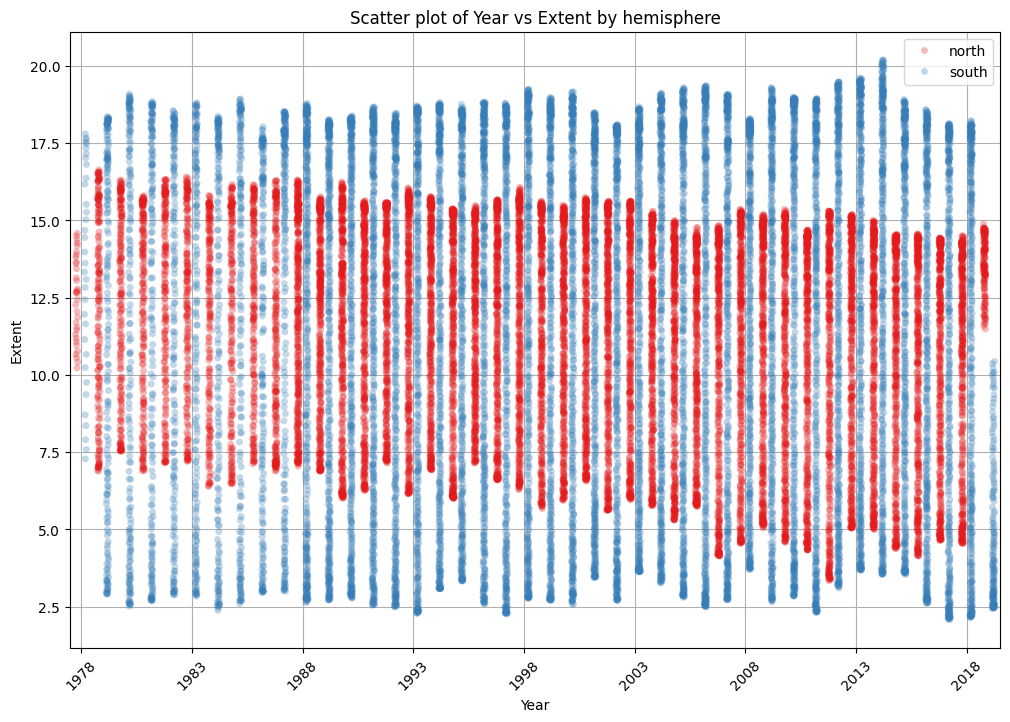

In [2]:
# 단계4 탐색적 데이터 분석하기
# 해빙 면적 데이터 탐색적 분석하기

#1-1 해빙 면적 데이터에 ‘Scatter Plot’ 위젯을 연결하여 연도별 해빙의 범위를 산점도로 확인한다

import seaborn as sns

# 산점도 시각화
x_column = 'Year'  # x축에 사용할 열 이름 - 연도
y_column = 'Extent'  # y축에 사용할 열 이름 - 해빙면적
hue_column = 'hemisphere'  # 색상을 그룹화할 열 이름 - 예: 북반구와 남반구

plt.figure(figsize=(12, 8))  # 그래프 크기 설정
sns.stripplot(x=x_column, y=y_column, hue=hue_column, data=df_seaice, dodge=True, palette='Set1', alpha=0.3, jitter=True)
plt.title(f'Scatter plot of {x_column} vs {y_column} by {hue_column}')

# x축의 년도 간격 설정
current_values = plt.gca().get_xticks()
plt.xticks(ticks=current_values[::5], rotation=45)  # 5년 간격으로 레이블 표시

plt.xlabel(x_column)
plt.ylabel(y_column)
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

In [3]:
#1-2 해빙 면적 데이터에 ‘Select Rows’ 위젯을 연결한다. 북반구의 해빙 면적의 변화량을 알
#아보기 위해 북반구 데이터를 추출한다. 또한 해수면 데이터가 2013년도까지 있으므로
#조건을 추가하여 2013년 이하의 데이터를 추출한다.

df_north_sea_ice_2013 = df_seaice[(df_seaice['hemisphere'] == 'north') & (df_seaice['Year'] <= 2013)]

# 결과 확인
print(df_north_sea_ice_2013.head())


   Year  Month  Day  Extent  Missing  \
0  1978     10   26  10.231      0.0   
1  1978     10   28  10.420      0.0   
2  1978     10   30  10.557      0.0   
3  1978     11    1  10.670      0.0   
4  1978     11    3  10.777      0.0   

                                         Source Data hemisphere  
0   ['ftp://sidads.colorado.edu/pub/DATASETS/nsid...      north  
1   ['ftp://sidads.colorado.edu/pub/DATASETS/nsid...      north  
2   ['ftp://sidads.colorado.edu/pub/DATASETS/nsid...      north  
3   ['ftp://sidads.colorado.edu/pub/DATASETS/nsid...      north  
4   ['ftp://sidads.colorado.edu/pub/DATASETS/nsid...      north  


    Year     Extent
0   1978  12.487000
1   1979  12.319560
2   1980  12.334148
3   1981  12.135486
4   1982  12.439445
5   1983  12.335896
6   1984  11.912601
7   1985  11.986599
8   1986  12.208224
9   1987  11.397227
10  1988  12.093169
11  1989  11.966855
12  1990  11.693841
13  1991  11.749258
14  1992  12.110481
15  1993  11.923052
16  1994  12.011318
17  1995  11.415110
18  1996  11.840787
19  1997  11.667614
20  1998  11.757381
21  1999  11.691466
22  2000  11.508175
23  2001  11.600016
24  2002  11.362866
25  2003  11.397222
26  2004  11.240434
27  2005  10.906975
28  2006  10.772614
29  2007  10.474096
30  2008  10.977847
31  2009  10.931970
32  2010  10.711392
33  2011  10.483496
34  2012  10.406098
35  2013  10.897115
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    36 non-null     int64  
 1   Extent  36 non-null     float64
dtypes: fl

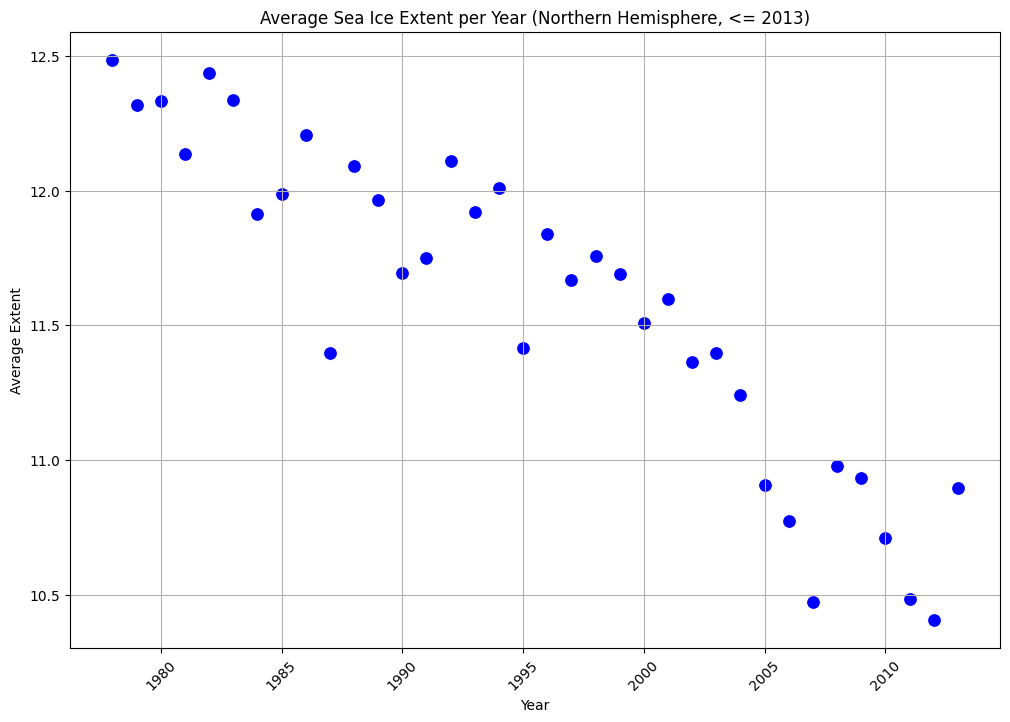

In [4]:
#1-3 ‘Select Rows’에 ‘Group by’ 위젯을 연결하여 연도별로 그룹화하고 ‘Extent(해빙의 범
#위)’ 평균값을 구한다.
# 연도별로 그룹화하여 Extent의 평균값을 계산
df_north_group_sea_ice_2013 = df_north_sea_ice_2013.groupby('Year')['Extent'].mean().reset_index()

# 결과 확인
print(df_north_group_sea_ice_2013)
df_north_group_sea_ice_2013.info()

# 평균값을 시각화 (산점도)
plt.figure(figsize=(12, 8))  # 그래프 크기 설정
sns.scatterplot(x='Year', y='Extent', data=df_north_group_sea_ice_2013, s=100, color='blue')
plt.xticks(rotation=45)  # x축 레이블 회전
plt.title('Average Sea Ice Extent per Year (Northern Hemisphere, <= 2013)')
plt.xlabel('Year')
plt.ylabel('Average Extent')
plt.grid(True)
plt.show()

     Year        GMSL
0    1880 -158.725000
1    1881 -153.058333
2    1882 -169.883333
3    1883 -164.591667
4    1884 -143.750000
..    ...         ...
129  2009   58.016667
130  2010   65.750000
131  2011   67.300000
132  2012   76.083333
133  2013   67.725000

[134 rows x 2 columns]


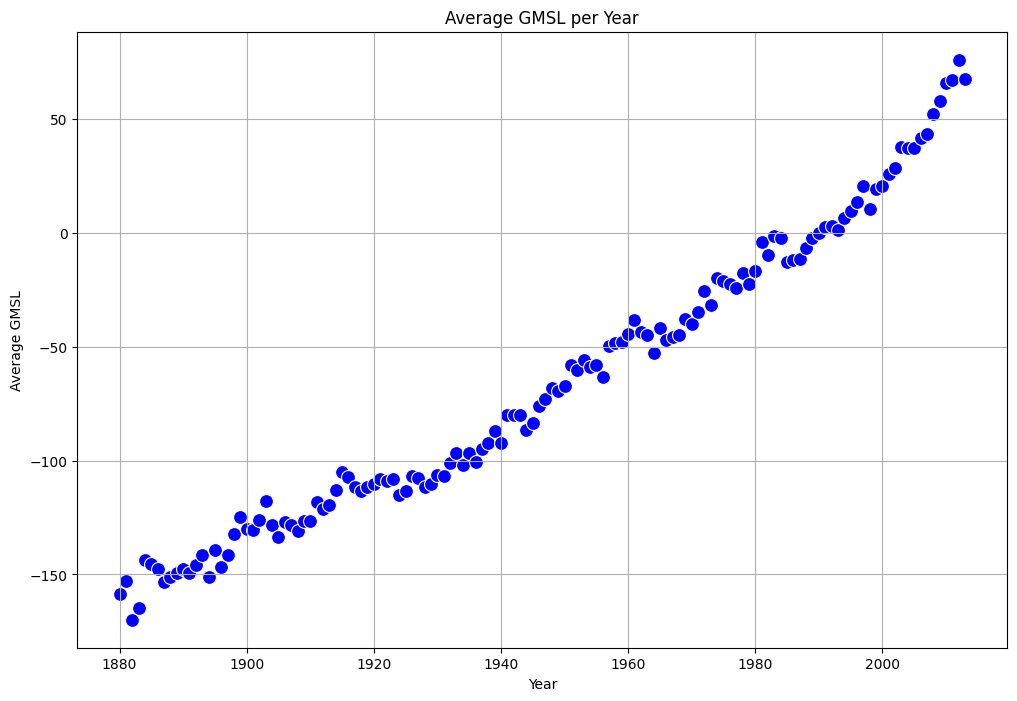

In [5]:
#2 해수면 변화량 데이터 탐색적 분석하기
#‘Formula’에 ‘Edit Domain’ 위젯을 연결하여 추출된 연, 월, 일의 속성을 문자에서 수치형
#으로 변경한다.
# ‘Edit Domain’에 ‘Group by’ 위젯을 연결하여 연도별로 그룹화하고 ‘GMSL(세계 평균 해
#수면 높이)’의 평균값을 구한다
#df_sealevel


# Time 열에서 연도 추출해서 새로운 Year 컬럼 만들기
df_sealevel['Year'] = pd.to_datetime(df_sealevel['Time']).dt.year

# 연도별로 그룹화하여 GMSL의 평균값을 계산
df_sealevel_group = df_sealevel.groupby('Year')['GMSL'].mean().reset_index()

# 결과 확인
print(df_sealevel_group)

#4 ‘Group by’에 ‘Scatter Plot’ 위젯을 연결하여 연도별 ‘GMSL(세계 평균 해수면 높이)’의
#변화량을 확인한다

# 평균값을 시각화 (산점도)
plt.figure(figsize=(12, 8))  # 그래프 크기 설정
sns.scatterplot(x='Year', y='GMSL', data=df_sealevel_group, s=100, color='blue')
plt.title('Average GMSL per Year')
plt.xlabel('Year')
plt.ylabel('Average GMSL')
plt.grid(True)
plt.show()

훈련 데이터:
<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 34 to 28
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    25 non-null     int64  
 1   Extent  25 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 600.0 bytes

테스트 데이터:
<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, 35 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    11 non-null     int64  
 1   Extent  11 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 264.0 bytes
MSE: 0.07914844395904726
RMSE: 0.2813333324706606
MAE: 0.22940111469322505
R²: 0.5502602351923155


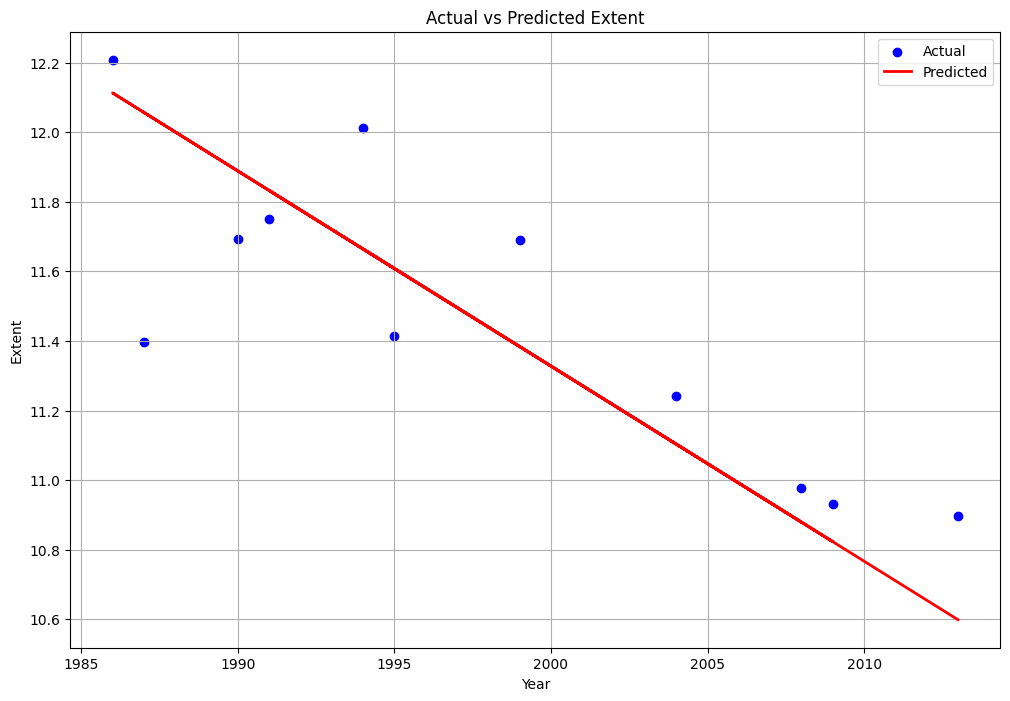

In [6]:
#단계5 데이터 모델링과 결과 분석하기
#‘Group By’로 그룹화된 해빙 면적 데이터에서 ‘Select Columns’ 위젯을 연결하여 다음
#과 같이 설정한다. ‘Select Columns’에 ‘Data Sampler’ 위젯을 연결하여 훈련 데이터와
#테스트 데이터를 분할한다

#df_north_group_sea_ice_2013
from sklearn.model_selection import train_test_split


# 훈련 데이터와 테스트 데이터로 7:3 비율로 나누기
train_df, test_df = train_test_split(df_north_group_sea_ice_2013, test_size=0.3, random_state=42)

# 결과 확인
print("훈련 데이터:")
train_df.info()
print("\n테스트 데이터:")
test_df.info()

#해빙면적 선형회귀 회귀 모델 생성
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# 특성(Year)과 타깃(Extent)으로 분리
X_train = train_df[['Year']]
y_train = train_df['Extent']
X_test = test_df[['Year']]
y_test = test_df['Extent']

# 선형 회귀 모델 생성 및 훈련
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# 예측
y_pred = linear_model.predict(X_test)

# 성능 평가
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 성능평가 출력
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R²: {r2}')

# 예측 결과 시각화
plt.figure(figsize=(12, 8))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Year')
plt.ylabel('Extent')
plt.title('Actual vs Predicted Extent')
plt.legend()
plt.grid(True)
plt.show()


훈련 데이터:
<class 'pandas.core.frame.DataFrame'>
Index: 93 entries, 81 to 102
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    93 non-null     int32  
 1   GMSL    93 non-null     float64
dtypes: float64(1), int32(1)
memory usage: 1.8 KB

테스트 데이터:
<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, 127 to 15
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    41 non-null     int32  
 1   GMSL    41 non-null     float64
dtypes: float64(1), int32(1)
memory usage: 820.0 bytes
MSE: 106.15261511619872
RMSE: 10.303039120385728
MAE: 8.894837009504272
R²: 0.9714973165273185


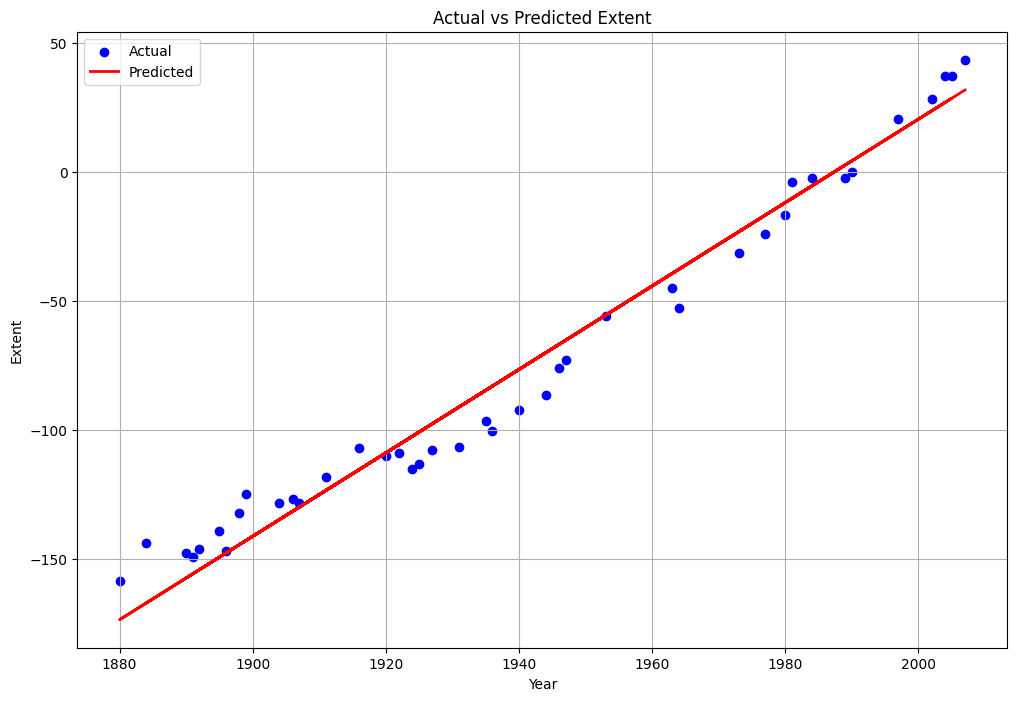

In [7]:
#해수면면적 선형회귀 회귀 모델 생성

from sklearn.model_selection import train_test_split


# 훈련 데이터와 테스트 데이터로 7:3 비율로 나누기
train_df, test_df = train_test_split(df_sealevel_group, test_size=0.3, random_state=42)

# 결과 확인
print("훈련 데이터:")
train_df.info()
print("\n테스트 데이터:")
test_df.info()

#해빙면적 선형회귀 회귀 모델 생성
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# 특성(Year)과 타깃(Extent)으로 분리
X_train = train_df[['Year']]
y_train = train_df['GMSL']
X_test = test_df[['Year']]
y_test = test_df['GMSL']

# 선형 회귀 모델 생성 및 훈련
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# 예측
y_pred = linear_model.predict(X_test)

# 성능 평가
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 성능평가 출력
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R²: {r2}')

# 예측 결과 시각화
plt.figure(figsize=(12, 8))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Year')
plt.ylabel('Extent')
plt.title('Actual vs Predicted Extent')
plt.legend()
plt.grid(True)
plt.show()







In [8]:
#단계 6 결과 해석 및 공유하기
#해빙의 변화량 데이터와 해수면의 데이터는 연도별 그룹화된 값을 포함하고 있으므로,
#‘Merge Data’ 위젯을 연결하여 두 데이터가 하나로 통합된 데이터로 표현할 수 있다


In [9]:
# df_north_group_sea_ice_2013
# df_sealevel_group

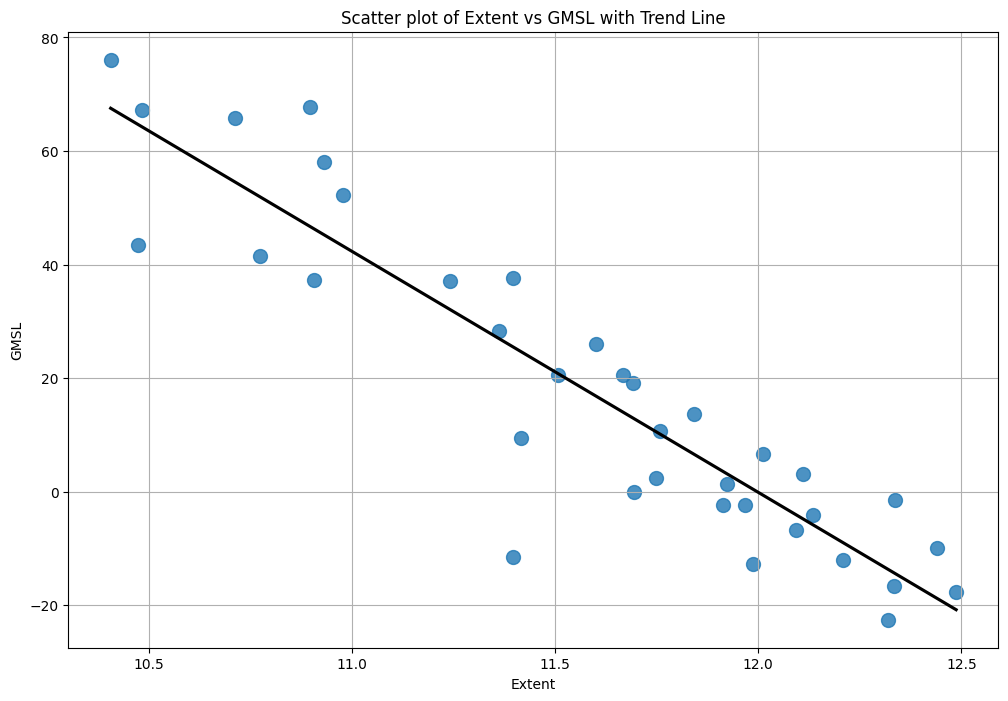

상관계수: -0.9142170377231118


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 연도를 기준으로 두 데이터 프레임 병합
df_merged = pd.merge(df_north_group_sea_ice_2013, df_sealevel_group, on='Year')

# 결과 확인
# df_merged

# 산점도와 추세선 시각화
plt.figure(figsize=(12, 8))
sns.regplot(x='Extent', y='GMSL', data=df_merged, scatter_kws={'s':100}, line_kws={'color':'black'}, ci=None)
plt.title('Scatter plot of Extent vs GMSL with Trend Line')
plt.xlabel('Extent')
plt.ylabel('GMSL')
plt.grid(True)
plt.show()

# # 상관계수 계산 및 출력
correlation = df_merged['Extent'].corr(df_merged['GMSL'])
print(f'상관계수: {correlation}')
